# Importing the Required Librarires

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt

# loading The Dataset

In [3]:
data = pd.read_excel('training dataset.xlsx')

# Separate the input features and target variables

In [4]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Max. Def.1'], axis=1)

# Separate the input features and target variables
X = data[['L(mm)', 'D(mm)', 'THd(mm)', 'THb(mm)', 'ANGLE']]
y_energy = data['Energy(kJ) ']
y_mass = data['Mass(g)']
y_max_def = data['Max. Def']

# Split the data into training and testing sets

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_energy_train, y_energy_test, y_mass_train, y_mass_test, y_max_def_train, y_max_def_test = train_test_split(
    X, y_energy, y_mass, y_max_def, test_size=0.1, random_state=42)


# Standardize the input features

In [6]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the energy model architecture

In [17]:
# Define the energy model architecture
model_energy = Sequential()
model_energy.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_energy.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_energy.add(Dense(1))

# Compile the energy model
optimizer = Adam(learning_rate=0.001)
model_energy.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the energy model
history_energy = model_energy.fit(X_train_scaled, y_energy_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
41/41 [==============================] - 1s 10ms/step - loss: 496093.9062 - mae: 704.1754 - val_loss: 482288.5000 - val_mae: 694.3232
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 443346.7188 - mae: 665.3343 - val_loss: 388477.8750 - val_mae: 622.9702
Epoch 3/100
41/41 [==============================] - 0s 5ms/step - loss: 298889.3438 - mae: 543.5566 - val_loss: 196037.5000 - val_mae: 440.9484
Epoch 4/100
41/41 [==============================] - 0s 5ms/step - loss: 103218.6953 - mae: 306.2479 - val_loss: 33363.1992 - val_mae: 168.9047
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 13288.7461 - mae: 93.9046 - val_loss: 7056.4365 - val_mae: 67.0427
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 7223.4678 - mae: 66.7310 - val_loss: 6550.6689 - val_mae: 64.7796
Epoch 7/100
41/41 [==============================] - 0s 5ms/step - loss: 6727.1724 - mae: 64.3261 - val_loss: 6180.7632 - val_mae: 62.7262
E

Epoch 60/100
41/41 [==============================] - 0s 7ms/step - loss: 271.4847 - mae: 13.5319 - val_loss: 254.9352 - val_mae: 12.7005
Epoch 61/100
41/41 [==============================] - 0s 5ms/step - loss: 266.9725 - mae: 13.4368 - val_loss: 237.7710 - val_mae: 12.2766
Epoch 62/100
41/41 [==============================] - 0s 7ms/step - loss: 262.7228 - mae: 13.3360 - val_loss: 243.2333 - val_mae: 12.3599
Epoch 63/100
41/41 [==============================] - 0s 5ms/step - loss: 259.0675 - mae: 13.3026 - val_loss: 245.4935 - val_mae: 12.3980
Epoch 64/100
41/41 [==============================] - 0s 5ms/step - loss: 256.8370 - mae: 13.2729 - val_loss: 242.7601 - val_mae: 12.4608
Epoch 65/100
41/41 [==============================] - 0s 5ms/step - loss: 253.3326 - mae: 13.1549 - val_loss: 240.8001 - val_mae: 12.2966
Epoch 66/100
41/41 [==============================] - 0s 5ms/step - loss: 252.9541 - mae: 13.1302 - val_loss: 248.6338 - val_mae: 12.5652
Epoch 67/100
41/41 [==============

In [18]:
# Define the mass model architecture
model_mass = Sequential()
model_mass.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_mass.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_mass.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_mass.add(Dense(1))

# Compile the mass model
model_mass.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the mass model
history_mass = model_mass.fit(X_train_scaled, y_mass_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
41/41 [==============================] - 1s 11ms/step - loss: 1847.1763 - mae: 33.7217 - val_loss: 302.3123 - val_mae: 14.2418
Epoch 2/100
41/41 [==============================] - 0s 6ms/step - loss: 290.8500 - mae: 13.6422 - val_loss: 204.6451 - val_mae: 11.6301
Epoch 3/100
41/41 [==============================] - 0s 6ms/step - loss: 201.6510 - mae: 11.3976 - val_loss: 164.3869 - val_mae: 10.4700
Epoch 4/100
41/41 [==============================] - 0s 6ms/step - loss: 166.2895 - mae: 10.5075 - val_loss: 138.2723 - val_mae: 9.6913
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 140.6708 - mae: 9.7546 - val_loss: 118.2948 - val_mae: 9.0413
Epoch 6/100
41/41 [==============================] - 0s 10ms/step - loss: 121.2776 - mae: 9.1799 - val_loss: 108.4165 - val_mae: 8.6845
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 109.1216 - mae: 8.7356 - val_loss: 97.3530 - val_mae: 8.3601
Epoch 8/100
41/41 [===========================

In [19]:
# Define the max.def model architecture
model_max_def = Sequential()
model_max_def.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_max_def.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_max_def.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_max_def.add(Dense(1))

# Compile the max.def model
model_max_def.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Train the max.def model
history_max_def = model_max_def.fit(X_train_scaled, y_max_def_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
41/41 [==============================] - 1s 12ms/step - loss: 0.2810 - mae: 0.0564 - val_loss: 0.1201 - val_mae: 0.0177
Epoch 2/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0787 - mae: 0.0141 - val_loss: 0.0504 - val_mae: 0.0115
Epoch 3/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0378 - mae: 0.0099 - val_loss: 0.0276 - val_mae: 0.0085
Epoch 4/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0219 - mae: 0.0086 - val_loss: 0.0169 - val_mae: 0.0086
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0139 - mae: 0.0085 - val_loss: 0.0111 - val_mae: 0.0083
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0093 - mae: 0.0084 - val_loss: 0.0077 - val_mae: 0.0081
Epoch 7/100
41/41 [==============================] - 1s 12ms/step - loss: 0.0066 - mae: 0.0084 - val_loss: 0.0055 - val_mae: 0.0082
Epoch 8/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0048

41/41 [==============================] - 0s 8ms/step - loss: 9.3024e-05 - mae: 0.0083 - val_loss: 8.5619e-05 - val_mae: 0.0081
Epoch 61/100
41/41 [==============================] - 0s 6ms/step - loss: 9.3687e-05 - mae: 0.0084 - val_loss: 8.6041e-05 - val_mae: 0.0080
Epoch 62/100
41/41 [==============================] - 0s 6ms/step - loss: 9.5112e-05 - mae: 0.0084 - val_loss: 8.5645e-05 - val_mae: 0.0081
Epoch 63/100
41/41 [==============================] - 0s 8ms/step - loss: 9.2402e-05 - mae: 0.0083 - val_loss: 8.9204e-05 - val_mae: 0.0083
Epoch 64/100
41/41 [==============================] - 0s 8ms/step - loss: 9.2154e-05 - mae: 0.0083 - val_loss: 9.2859e-05 - val_mae: 0.0084
Epoch 65/100
41/41 [==============================] - 0s 6ms/step - loss: 9.3277e-05 - mae: 0.0083 - val_loss: 8.7020e-05 - val_mae: 0.0082
Epoch 66/100
41/41 [==============================] - 0s 7ms/step - loss: 9.2110e-05 - mae: 0.0083 - val_loss: 8.5617e-05 - val_mae: 0.0080
Epoch 67/100
41/41 [=============

In [20]:
# Evaluate the models
energy_loss, energy_mae = model_energy.evaluate(X_test_scaled, y_energy_test)
mass_loss, mass_mae = model_mass.evaluate(X_test_scaled, y_mass_test)
max_def_loss, max_def_mae = model_max_def.evaluate(X_test_scaled, y_max_def_test)

print('Energy Prediction - Test Loss:', energy_loss)
print('Energy Prediction - Test MAE:', energy_mae)
print('Mass Prediction - Test Loss:', mass_loss)
print('Mass Prediction - Test MAE:', mass_mae)
print('Max. Def Prediction - Test Loss:', max_def_loss)
print('Max. Def Prediction - Test MAE:', max_def_mae)

6/6 [==============================] - 0s 3ms/step - loss: 8.7264e-05 - mae: 0.0079
Energy Prediction - Test Loss: 279.21270751953125
Energy Prediction - Test MAE: 14.106149673461914
Mass Prediction - Test Loss: 80.3783950805664
Mass Prediction - Test MAE: 7.427206039428711
Max. Def Prediction - Test Loss: 8.726352825760841e-05
Max. Def Prediction - Test MAE: 0.007877153344452381


# Make predictions 

In [21]:
y_energy_pred = model_energy.predict(X_test_scaled)
y_mass_pred = model_mass.predict(X_test_scaled)
y_max_def_pred = model_max_def.predict(X_test_scaled)

6/6 [==============================] - 0s 3ms/step


# Create a DataFrame for real and predicted values

In [22]:
results = pd.DataFrame({
    'Real Energy': y_energy_test.values.flatten(),
    'Predicted Energy': y_energy_pred.flatten(),
    'Real Mass': y_mass_test.values.flatten(),
    'Predicted Mass': y_mass_pred.flatten(),
    'Real Max. Def': y_max_def_test.values.flatten(),
    'Predicted Max. Def': y_max_def_pred.flatten()
})

In [23]:
results

,Real Energy,Predicted Energy,Real Mass,Predicted Mass,Real Max. Def,Predicted Max. Def
0,722.117882,708.522034,73.005394,89.319595,0.118882,0.118602
1,697.116753,708.768066,79.516889,87.920898,0.110693,0.118602
2,717.296973,715.558899,102.643105,86.379646,0.117864,0.118602
3,733.613843,707.770630,75.583082,87.146774,0.124821,0.118602
4,726.353501,707.623901,96.894694,87.370178,0.111644,0.118602
...,...,...,...,...,...,...
175,733.412392,703.145020,96.820814,90.582573,0.113104,0.118602
176,699.939811,727.644714,84.206071,92.393982,0.115075,0.118602
177,722.081292,711.249817,78.564899,87.831421,0.126838,0.118602
178,687.496594,713.757935,88.230855,89.379707,0.125774,0.118602


# Plotings

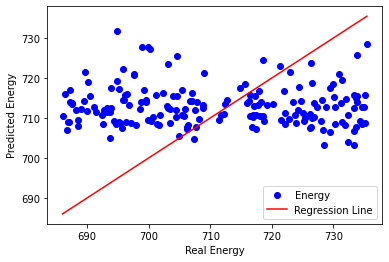

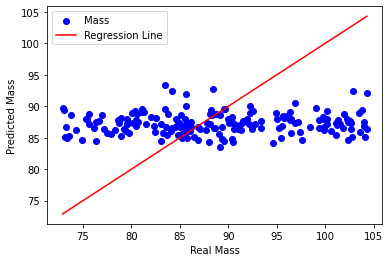

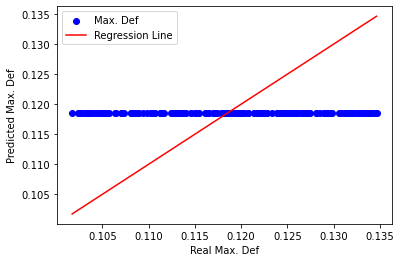

In [24]:
# Plot regression line for energy predictions
plt.scatter(y_energy_test, y_energy_pred, color='b', label='Energy')
plt.plot([min(y_energy_test), max(y_energy_test)], [min(y_energy_test), max(y_energy_test)], color='r', label='Regression Line')
plt.xlabel('Real Energy')
plt.ylabel('Predicted Energy')
plt.legend()
plt.show()

# Plot regression line for mass predictions
plt.scatter(y_mass_test, y_mass_pred, color='b', label='Mass')
plt.plot([min(y_mass_test), max(y_mass_test)], [min(y_mass_test), max(y_mass_test)], color='r', label='Regression Line')
plt.xlabel('Real Mass')
plt.ylabel('Predicted Mass')
plt.legend()
plt.show()

# Plot regression line for max.def predictions
plt.scatter(y_max_def_test, y_max_def_pred, color='b', label='Max. Def')
plt.plot([min(y_max_def_test), max(y_max_def_test)], [min(y_max_def_test), max(y_max_def_test)], color='r', label='Regression Line')
plt.xlabel('Real Max. Def')
plt.ylabel('Predicted Max. Def')
plt.legend()
plt.show()

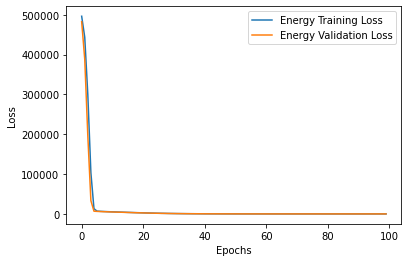

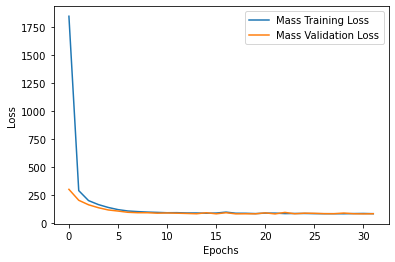

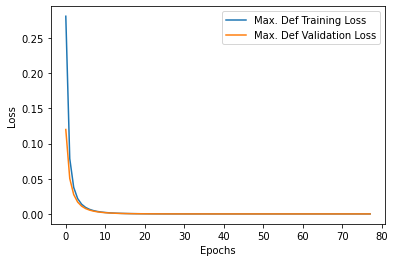

In [25]:
# Plot training and validation loss for energy model
plt.plot(history_energy.history['loss'], label='Energy Training Loss')
plt.plot(history_energy.history['val_loss'], label='Energy Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation loss for mass model
plt.plot(history_mass.history['loss'], label='Mass Training Loss')
plt.plot(history_mass.history['val_loss'], label='Mass Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation loss for max.def model
plt.plot(history_max_def.history['loss'], label='Max. Def Training Loss')
plt.plot(history_max_def.history['val_loss'], label='Max. Def Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()